In [ ]:
import tensorflow as tf
import os
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

classes={}
classes['013.Bobolink']=0
classes['034.Gray_crowned_Rosy_Finch']=1
classes['041.Scissor_tailed_Flycatcher']=2
classes['067.Anna_Hummingbird']=3
classes['114.Black_throated_Sparrow']=4
classes['142.Black_Tern']=5
classes['170.Mourning_Warbler']=6


def get_label(path):
    return classes[path.split('/')[-2]]

data = [];labels = []
for subdir, dirs, files in os.walk(r'/content/drive/My Drive/DEEP LEARNING ASSIGNMENTS/ASSIGN3/Imagedata'):
    for filename in files:
        filepath = subdir + os.sep + filename
        data += [decode_img(tf.io.read_file(filepath)).numpy()]
        labels += [np.array([get_label(filepath)])]


In [ ]:
X_tr, X_te, Y_tr, Y_te = train_test_split(data, labels, train_size = 0.7, random_state = 5)
X_val, X_test, Y_val,Y_test = train_test_split(X_te, Y_te, train_size = 0.33, random_state = 5)
print(len(X_tr), len(X_val), len(X_test))

X_tr = np.array(X_tr)
Y_tr = np.array(Y_tr)

X_val = np.array(X_val)
Y_val = np.array(Y_val)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_tr.shape, X_val.shape, X_test.shape, Y_tr.shape)
# print(X_tr.type)

293 41 85
(293, 224, 224, 3) (41, 224, 224, 3) (85, 224, 224, 3) (293, 1)


In [ ]:
aug = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.AveragePooling2D((2, 2),strides = (2,2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2),strides = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7))
model.summary()

model.compile(optimizer='adam',metrics=['accuracy'],
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              )
early_stopping_monitor = EarlyStopping(monitor = 'loss',min_delta = 0.01)
history = model.fit(X_tr, Y_tr, epochs=100,validation_data=(X_val,Y_val),callbacks=[early_stopping_monitor])
score, acc = model.evaluate(X_test, Y_test)
print(score,acc)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 4)       112       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 111, 111, 4)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 109, 109, 16)      592       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               5972096   
_________________________________________________________________
dense_15 (Dense)             (None, 7)                

In [ ]:
score, acc = model.evaluate(X_test, Y_test)
print(score,acc)

3/3 [==============================] - 0s 7ms/step - loss: 2.1882 - accuracy: 0.4235
2.188183307647705 0.42352941632270813


In [ ]:
# model.save_weights('/content/drive/My Drive/DEEP LEARNING ASSIGNMENTS/ASSIGN3/cnn_weights_new.h5')

In [ ]:
model.load_weights('/content/drive/My Drive/DEEP LEARNING ASSIGNMENTS/ASSIGN3/cnn_weights_new.h5')
score, acc = model.evaluate(X_tr, Y_tr)
print('train_accuracy: ',acc)
score, acc = model.evaluate(X_val, Y_val)
print('val_accuracy: ',acc)
score, acc = model.evaluate(X_test, Y_test)
print('test_accuracy: ',acc)

10/10 [==============================] - 0s 11ms/step - loss: 0.0404 - accuracy: 1.0000
train_accuracy:  1.0
2/2 [==============================] - 0s 4ms/step - loss: 1.9249 - accuracy: 0.4634
val_accuracy:  0.46341463923454285
3/3 [==============================] - 0s 8ms/step - loss: 1.7947 - accuracy: 0.4824
test_accuracy:  0.48235294222831726


Number of epochs taken: 18


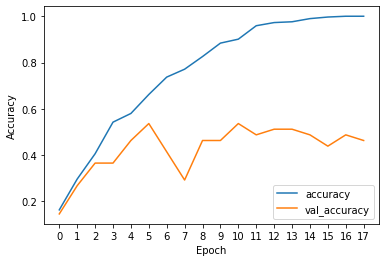

In [ ]:
print('Number of epochs taken:',len(history.history['loss']))
fig, ax = plt.subplots()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
ax.set_xticks(np.arange(0,len(history.history['loss']),1))
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
from keras import utils as np_utils
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
print(y_train[0])
y_train = np_utils.to_categorical(y_train, num_classes = 10)
print(y_train[0])

(50000, 32, 32, 3) (50000, 1)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
